#### Input
The input csv file is a concatenation of the `TEST-*_stats.csv` file output from `checker.py` (i.e., the last steps in `04_check_variants.sh`), which provides true positive, false positive, false negative, precision, and recall values after variant-calling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key savefig.frameon in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

In [158]:
stats = pd.read_csv('20210511_all_stats.csv', header=None)

In [159]:
stats.rename(columns={0: 'file_prefix', 1: 'true_pos', 2: 'false_pos', 3: 'false_neg', 4: 'precision', 5: 'recall'}, inplace=True)

In [160]:
stats.loc[stats['recall'] == '.' , 'recall'] = np.nan
stats.loc[stats['precision'] == '.' , 'precision'] = np.nan
stats['recall'] = pd.to_numeric(stats['recall'])
stats['precision'] = pd.to_numeric(stats['precision'])

In [161]:
stats['true_pos'] = pd.to_numeric(stats['true_pos'])
stats['false_pos'] = pd.to_numeric(stats['false_pos'])
stats['false_neg'] = pd.to_numeric(stats['false_neg'])

In [144]:
num_snp = {'TEST-H37Rv20snps': 20, 'TEST-H37Rv200snps': 200, 'TEST-H37Rv2000snps': 2000, 'TEST-H37Rv20003snps': 20003, 'TEST-MTBREF': 0, 
            'TEST-MTBVAR1': 1048, 'TEST-MTBVAR2': 3277, 'TEST-MTBVAR3': 11, 'TEST-MTBVAR4': 149, 'TEST-MTBVAR5': 1480, 'TEST-MTBVAR6': 16468}
num_indel = {'TEST-H37Rv20snps': 0, 'TEST-H37Rv200snps': 0, 'TEST-H37Rv2000snps': 0, 'TEST-H37Rv20003snps': 0, 'TEST-MTBREF': 0, 
             'TEST-MTBVAR1': 3317, 'TEST-MTBVAR2': 1120, 'TEST-MTBVAR3': 9, 'TEST-MTBVAR4': 51, 'TEST-MTBVAR5': 524, 'TEST-MTBVAR6': 5472}

In [162]:
stats['dataset'] = [name.split('_')[0] for name in stats['file_prefix']]
stats['tool'] = [name.split('_')[-2] for name in stats['file_prefix']]
stats.loc[stats['tool'] == 'normalized', 'tool'] = 'discosnp'
stats['num_snp'] = [int(num_snp[ds]) for ds in stats['dataset']]
stats['num_indel'] = [int(num_indel[ds]) for ds in stats['dataset']]
stats['total_mutations'] = stats['num_snp'] + stats['num_indel']
stats['low_cov_mutations_filtered'] = stats['total_mutations'] - stats['true_pos'] - stats['false_neg']

In [163]:
stats

,file_prefix,true_pos,false_pos,false_neg,precision,recall,dataset,tool,num_snp,num_indel,total_mutations,low_cov_mutations_filtered
0,TEST-H37Rv20003snps_mq10_gatk_normalized,19758,41,0,0.997929,1.000000,TEST-H37Rv20003snps,gatk,20003,0,20003,245
1,TEST-H37Rv2000snps_mq10_gatk_normalized,1976,4,0,0.997980,1.000000,TEST-H37Rv2000snps,gatk,2000,0,2000,24
2,TEST-H37Rv200snps_mq10_gatk_normalized,198,1,0,0.994975,1.000000,TEST-H37Rv200snps,gatk,200,0,200,2
3,TEST-H37Rv20snps_mq10_gatk_normalized,19,1,0,0.950000,1.000000,TEST-H37Rv20snps,gatk,20,0,20,1
4,TEST-MTBREF_mq10_gatk_normalized,0,0,0,NaN,NaN,TEST-MTBREF,gatk,0,0,0,0
5,TEST-MTBVAR1_mq10_gatk_normalized,2659,1656,1,0.616222,0.999624,TEST-MTBVAR1,gatk,1048,3317,4365,1705
6,TEST-MTBVAR2_mq10_gatk_normalized,3778,566,1,0.869705,0.999735,TEST-MTBVAR2,gatk,3277,1120,4397,618
7,TEST-MTBVAR3_mq10_gatk_normalized,17,3,0,0.850000,1.000000,TEST-MTBVAR3,gatk,11,9,20,3
8,TEST-MTBVAR4_mq10_gatk_normalized,170,29,0,0.854271,1.000000,TEST-MTBVAR4,gatk,149,51,200,30
9,TEST-MTBVAR5_mq10_gatk_normalized,1705,278,0,0.859808,1.000000,TEST-MTBVAR5,gatk,1480,524,2004,299


In [142]:
import seaborn
import matplotlib.pyplot as plt

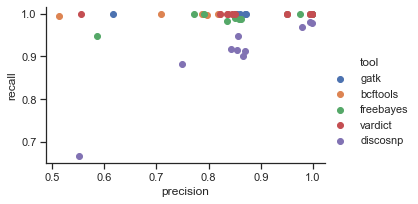

In [143]:
# https://stackoverflow.com/questions/14885895/color-by-column-values-in-matplotlib
seaborn.set(style='ticks')
fg = seaborn.FacetGrid(data=stats, hue='tool', aspect=1.61)
fg.map(plt.scatter, 'precision', 'recall').add_legend()

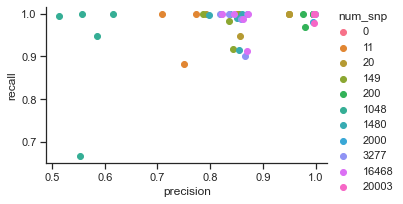

In [164]:
seaborn.set(style='ticks')
fg = seaborn.FacetGrid(data=stats, hue='num_snp', aspect=1.61)
fg.map(plt.scatter, 'precision', 'recall').add_legend()

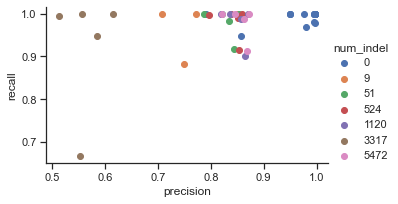

In [165]:
seaborn.set(style='ticks')
fg = seaborn.FacetGrid(data=stats, hue='num_indel', aspect=1.61)
fg.map(plt.scatter, 'precision', 'recall').add_legend()